In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.datasets import load_digits 
from scipy.ndimage import rotate  
warnings.filterwarnings(action='ignore')
%matplotlib inline

In [5]:
data = load_digits()
print(data.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [7]:
X= data.data
X.shape

(1797, 64)

In [8]:
Y = data['target']
Y.shape

(1797,)

In [13]:
def show_data(X,Y,n,angle = 0):
    print(Y[n])
    image_matrix = X[n].reshape(8,8)
    image_matrix = rotate(image_matrix,angle,cval=0.01,reshape=False)
    plt.imshow(image_matrix,cmap='gray',interpolation='None')
    plt.show()

0


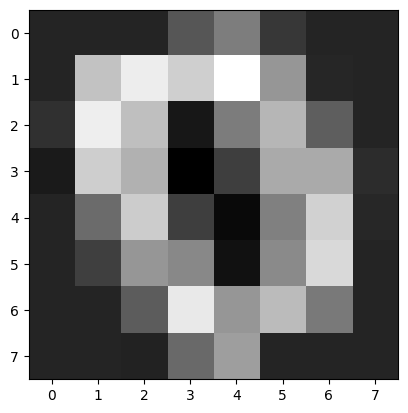

1


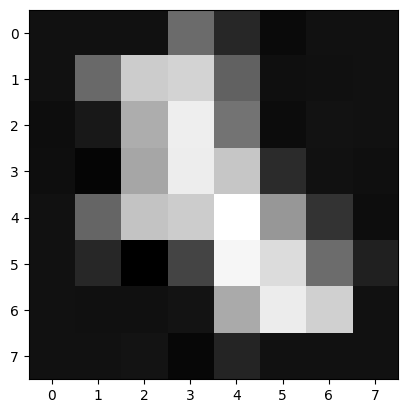

2


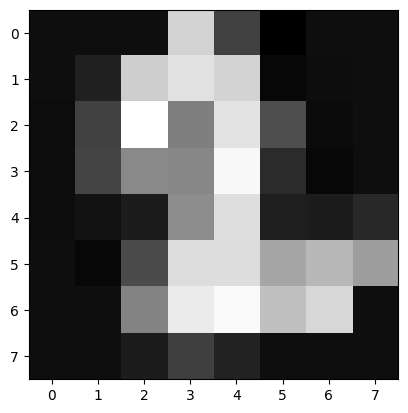

3


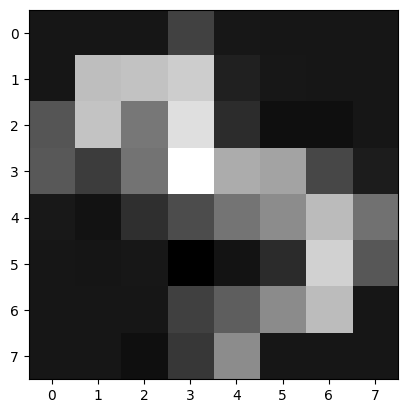

4


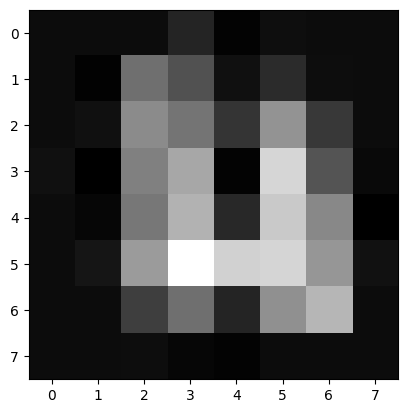

5


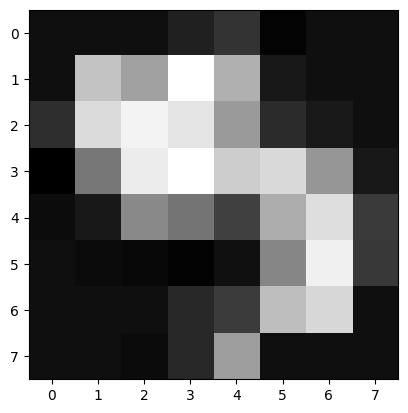

6


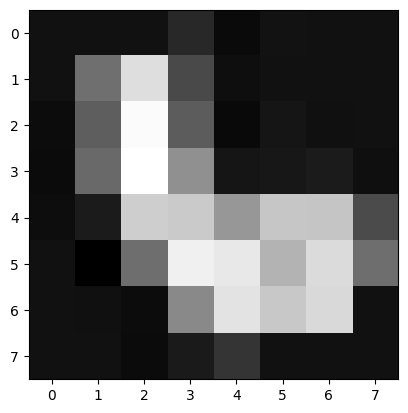

7


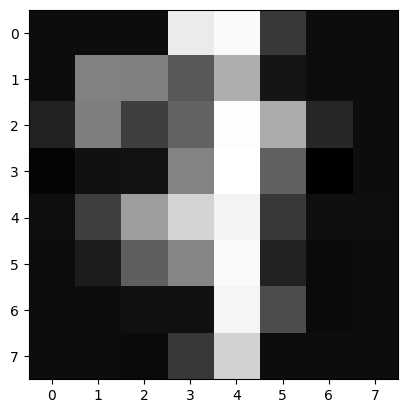

8


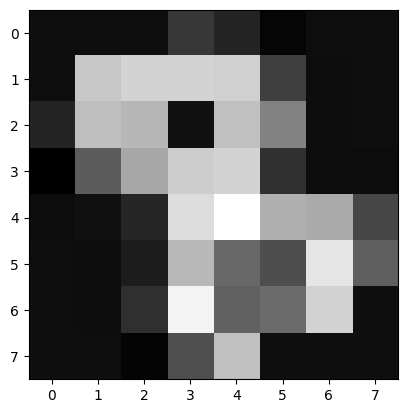

9


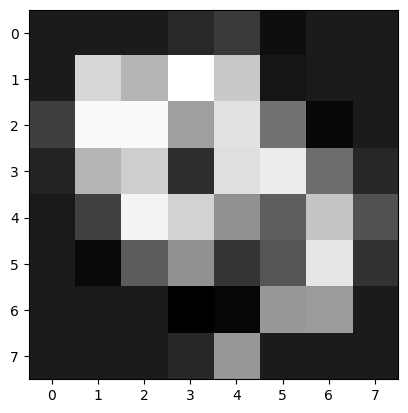

In [14]:
for i in range(10):
    show_data(X,Y,i,angle=30)

In [16]:
X_min = X.min()
X_max = X.max()
X_range = X_max - X_min

X = (X - X_min)/X_range
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1234)

In [18]:
depth_grid = range(1,21)
min_samples_leaf_grid = np.arange(2,31,2)
max_leaf_nodes_grid = np.arange(2,51,2)
parameters = {
    'max_depth': depth_grid,
    'min_samples_leaf': min_samples_leaf_grid,
    'max_leaf_nodes': max_leaf_nodes_grid
}

In [21]:
gridCV = GridSearchCV(DecisionTreeClassifier(),parameters,cv=10,n_jobs=-1)
gridCV.fit(X_train,y_train)
print("Best parameters: "+str(gridCV.best_params_))
best_depth = gridCV.best_params_['max_depth']

Best parameters: {'max_depth': 16, 'max_leaf_nodes': np.int64(48), 'min_samples_leaf': np.int64(4)}


In [22]:
print("Tree best max Depth: "+str(best_depth))
print("Tree best min samples leaf: "+str(gridCV.best_params_['min_samples_leaf']))
print("Tree best max leaf nodes: "+str(gridCV.best_params_['max_leaf_nodes']))


Tree best max Depth: 16
Tree best min samples leaf: 4
Tree best max leaf nodes: 48


In [25]:
DTC_best = DecisionTreeClassifier(max_depth=best_depth,min_samples_leaf=gridCV.best_params_['min_samples_leaf'],max_leaf_nodes=gridCV.best_params_['max_leaf_nodes'])
DTC_best.fit(X_train,y_train)
y_pred = DTC_best.predict(X_test)
print("Accuracy: "+str(np.round(metrics.accuracy_score(y_test,y_pred),3)))

Accuracy: 0.846


In [30]:
n_estimators_grid = range(20,50,2)
depth_grid = np.arange(1,10)
min_samples_leaf_grid = np.arange(10,21,2)

parameters = {
    'n_estimators': n_estimators_grid,
    'max_depth': depth_grid,
    'min_samples_leaf': min_samples_leaf_grid
}
gridCV = GridSearchCV(RandomForestClassifier(),param_grid = parameters,cv=10,n_jobs=-1)

gridCV.fit(X_train,y_train)
best_depth = gridCV.best_params_['max_depth']
best_min_samples_leaf = gridCV.best_params_['min_samples_leaf'] 

In [31]:
print("Best depth: "+str(best_depth))
print("Best min samples leaf: "+str(best_min_samples_leaf))
print("Best n_estimators: "+str(gridCV.best_params_['n_estimators']))


Best depth: 8
Best min samples leaf: 10
Best n_estimators: 46


In [ ]:
RF_best = RandomForestClassifier(
    n_estimators=10,
    max_depth=best_depth,
    min_samples_leaf=best_min_samples_leaf
    
)